# 2018_03_20_1pos2neg_longterm

Leaving the voltage on + 30 kV and - 30 kV for a longer time period.

In [6]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from loadLvm import *
from loadRadEye import *
%matplotlib inline

In [7]:
with open('data_dir.txt', 'r') as rfp:
    data_dir = rfp.read()
    
data_dir

'../../../Data/Lens Test Measurements'

In [12]:
fname = '2018_03_20-1pos2neg_longterm'
fnameradeye = '2018_03_20-1neg2pos_longterm'
fnamelvm = '{1}/{0}.lvm'.format(fname, data_dir)
fnameradeye = '{1}/{0}.log'.format(fnameradeye, data_dir)
dataLVM = loadlvm_electrostaticlenstests(fnamelvm)
dataRADEYE = load_radeyeg20(fnameradeye)

In [14]:
mask = (dataRADEYE.time <= dataLVM.time.iloc[-1]) & (dataRADEYE.time >= dataLVM.time.iloc[0])
dataRADEYE = dataRADEYE[mask]

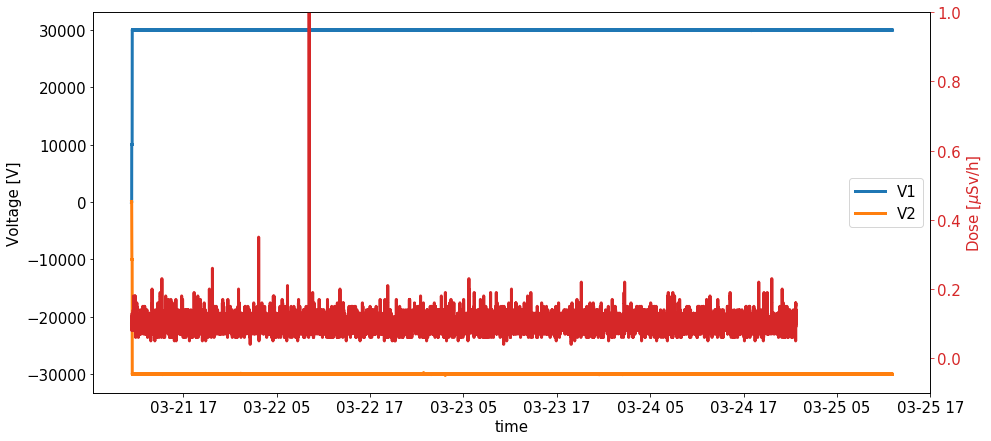

In [42]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time.values[::100], dataLVM.V1.values[::100], lw = 3, label = 'V1');
ax.plot(dataLVM.time.values[::100], dataLVM.V2.values[::100], lw = 3, label = 'V2');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('Voltage [V]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time.values, dataRADEYE['Dose Rate'].values, 'C3', lw = 3);
ax1.set_ylabel(r'Dose [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.set_ylim(ymin = -0.1, ymax = 1)
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);
fig.savefig('{0}_voltagedose.png'.format(fname))

In [43]:
tstart, tstop = dt.datetime(2018,3,22,9,9,40), dt.datetime(2018,3,22,9,10,30)
mrad = (dataRADEYE.time <= tstop) & (dataRADEYE.time >= tstart)
mlvm = (dataLVM.time <= tstop) & (dataLVM.time >= tstart)

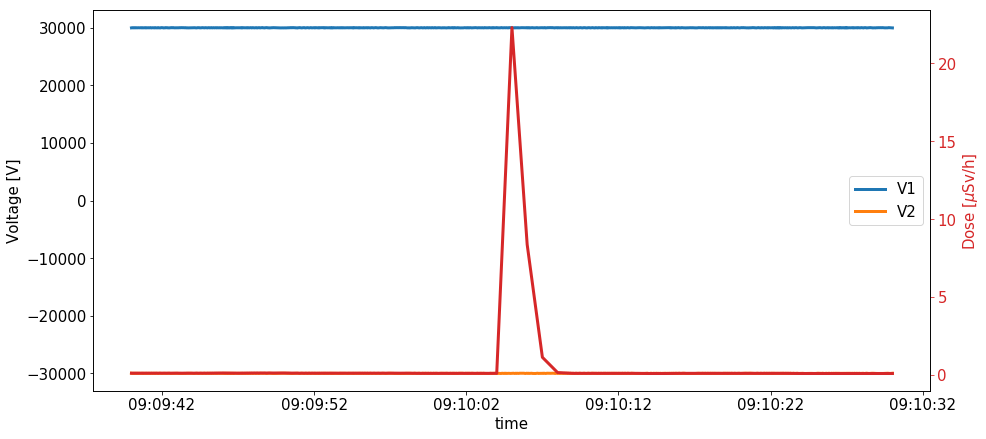

In [44]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time.values[mlvm][::5], dataLVM.V1.values[mlvm][::5], lw = 3, label = 'V1');
ax.plot(dataLVM.time.values[mlvm][::5], dataLVM.V2.values[mlvm][::5], lw = 3, label = 'V2');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('Voltage [V]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time.values[mrad], dataRADEYE['Dose Rate'].values[mrad], 'C3', lw = 3);
ax1.set_ylabel(r'Dose [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);
fig.savefig('{0}_voltagedose_spike.png'.format(fname))

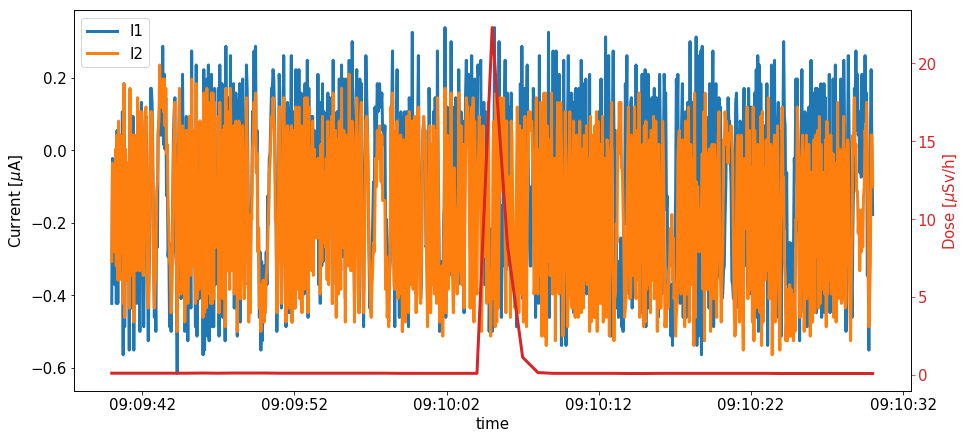

In [45]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time.values[mlvm][::5], dataLVM.I1[mlvm][::5], lw = 3, label = 'I1');
ax.plot(dataLVM.time.values[mlvm][::5], dataLVM.I2.values[mlvm][::5], lw = 3, label = 'I2');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('Current [$\mu$A]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time.values[mrad], dataRADEYE['Dose Rate'].values[mrad], 'C3', lw = 3);
ax1.set_ylabel(r'Dose [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);